In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [24]:
data = pd.read_csv(r'/media/daniel/DANIEL-2/D-drive/Coding/Major-Project/new_/data/preprocessed_data.csv')

In [25]:
X = data.drop(columns=["V"])  # all features except target
y = data["V"]                 # target variable

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(max_iter=5000),
    "Support Vector Regressor": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(n_estimators=200, random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=200, random_state=42, verbose=-1),
    "CatBoost": CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)
}

results = []

In [28]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Train_RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test_RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train_R2": r2_score(y_train, y_train_pred),
        "Test_R2": r2_score(y_test, y_test_pred)
    })

In [29]:
results_df = pd.DataFrame(results)

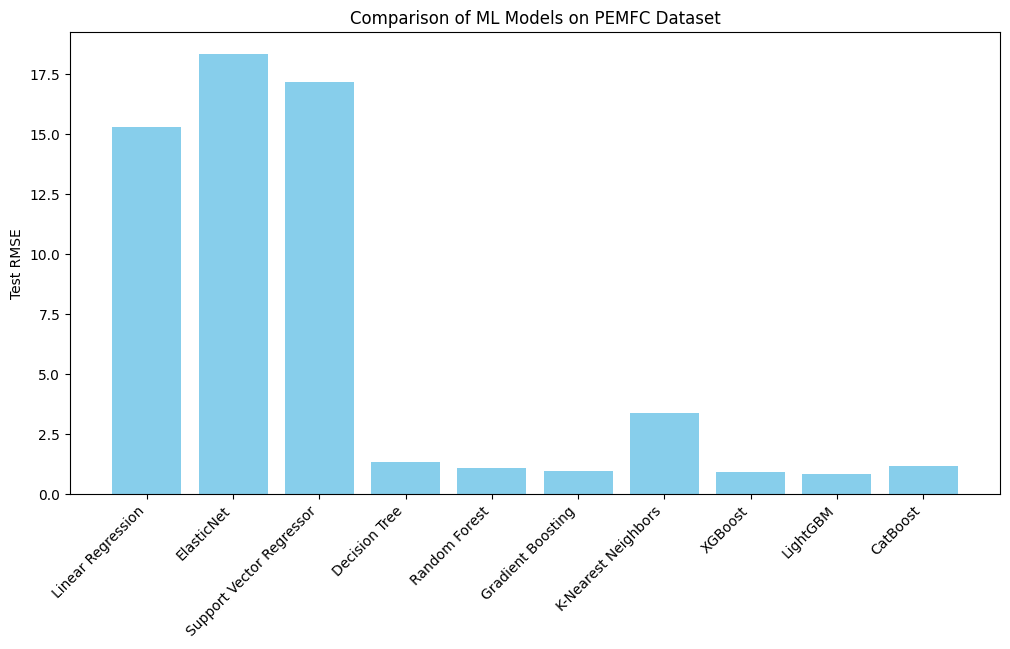

In [30]:
plt.figure(figsize=(12,6))
plt.bar(results_df["Model"], results_df["Test_RMSE"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Test RMSE")
plt.title("Comparison of ML Models on PEMFC Dataset")
plt.show()

In [31]:
results_df = results_df.sort_values(by="Test_R2", ascending=False).reset_index(drop=True)
display(results_df)

,Model,Train_RMSE,Test_RMSE,Train_R2,Test_R2
0,LightGBM,0.197274,0.843197,0.999990,0.999799
1,XGBoost,0.016243,0.949183,1.000000,0.999746
2,Gradient Boosting,0.477914,0.973458,0.999942,0.999732
3,Random Forest,0.357911,1.089770,0.999968,0.999665
4,CatBoost,0.674588,1.185376,0.999885,0.999603
5,Decision Tree,0.000002,1.355093,1.000000,0.999482
6,K-Nearest Neighbors,2.310619,3.394149,0.998646,0.996748
7,Linear Regression,15.299195,15.289868,0.940642,0.934002
8,Support Vector Regressor,17.015063,17.174685,0.926580,0.916727
9,ElasticNet,17.853193,18.327763,0.919169,0.905170
